# Линейная регрессия

# Задача 1

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [ ]:
data = """id,X,Y
1,3,8
2,18,34
3,17,46
4,24,60
5,7,19
6,19,31
7,8,11
8,10,19
9,20,45
10,6,7"""

In [ ]:
data = pd.read_csv(io.StringIO(data), index_col = 'id')
data

,X,Y
id,,
1,3,8
2,18,34
3,17,46
4,24,60
5,7,19
6,19,31
7,8,11
8,10,19
9,20,45


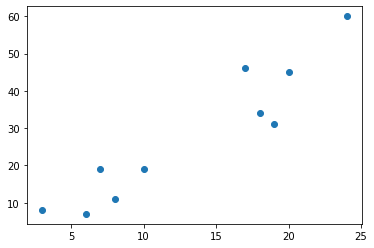

In [ ]:
plt.scatter(data.X, data.Y);

Определим выборочные средние столбцов X и Y

In [ ]:
print(data.X.mean())
print(data.Y.mean())

13.2
28.0


In [ ]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = pd.DataFrame(data.X)

In [ ]:
y_train = pd.DataFrame(data.Y)

In [ ]:
#обучаем модель линейной регрессии
reg_model = LinearRegression().fit(X_train, y_train)

Найдем коэффициенты $Θ_0$ и $Θ_1$

In [ ]:
# Тета 0
reg_model.intercept_

array([-3.29896907])

In [ ]:
# Тета 1
reg_model.coef_

array([[2.37113402]])

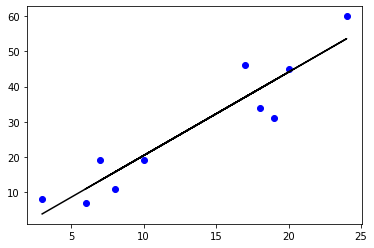

In [ ]:
plt.scatter(data.X, data.Y, color="blue")
plt.plot(data.X, reg_model.predict(X_train), color="black")

plt.show()

Для нахождения $R^2$ в данном случае нужно определить предсказания модели для тренировочных данных

In [ ]:
y_predicted = reg_model.predict(X_train)
y_predicted

array([[ 3.81443299],
       [39.3814433 ],
       [37.01030928],
       [53.60824742],
       [13.29896907],
       [41.75257732],
       [15.67010309],
       [20.41237113],
       [44.12371134],
       [10.92783505]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predicted)

0.8802057695907487

### Задача 2 

In [ ]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
DATA = pd.read_csv("https://studio.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/candy-data.csv", delimiter=',', index_col='competitorname')

In [ ]:
DATA

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [ ]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['100 Grand','3 Musketeers','One dime','One quarter','Air Heads'])

In [ ]:
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,1
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,1
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,0
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,0
Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [ ]:
#отбираем данные для предикторов, удаляя два последних столбца, индекс не включается в данные.
X_train = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [ ]:
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325
Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325
...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116


In [ ]:
#указываем столбец отклика
y_train = pd.DataFrame(train_data['winpercent'])

In [ ]:
y_train

,winpercent
competitorname,
Almond Joy,50.347546
Baby Ruth,56.914547
Boston Baked Beans,23.417824
Candy Corn,38.010963
Caramel Apple Pops,34.517681
...,...
Snickers Crisper,59.529251
Sour Patch Kids,59.863998
Sour Patch Tricksters,52.825947


In [ ]:
#обучение модели
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#предсказание для конфет введеных вручную
reg.predict([[1, 1, 1, 0, 1, 0, 1, 1, 1, 0.669, 0.456]])

/Users/rustamazimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[65.1303666]])

In [ ]:
X_for_prediction = pd.DataFrame([[1, 1, 1, 0, 1, 0, 1, 1, 1, 0.669, 0.456]], columns=X_train.columns)
X_for_prediction

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,1,1,0,1,0,1,1,1,0.669,0.456


In [ ]:
#предсказание для конфет введеных вручную
reg.predict(X_for_prediction)

array([[65.1303666]])

In [ ]:
#предсказание для конфет из таблицы

#выбираем строку из таблицы
AirHeads = DATA.loc[['Air Heads']]

#отбираем данные для предикторов и выполняем предсказание с помощью модели
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([[51.39969184]])

Значение коэффициента $\theta_0$:

In [ ]:
reg.intercept_

array([32.49207971])

Значение коэффициентов $\theta_1, \ldots, \theta_p$:

In [ ]:
reg.coef_

array([[ 27.80862379,  13.22742764,  -1.72139799,   9.31066552,
          2.47147143,   9.97210163,  -7.20313458,  -3.36948719,
         -1.92311592,  12.33760078, -10.75867374]])

In [ ]:
y_predicted = reg.predict(X_train)

In [ ]:
r2_score(y_train, y_predicted)

0.5871227359346516